# Project Title : Library Book Circulation and Popularity Analysis

# purpose:


         Analyzing library book circulation and popularity serves to inform collection management, resource allocation, patron engagement, reader recommendations, and the evaluation of services. By identifying which books are circulating well, librarians can make informed decisions about acquisitions and removals, allocate resources efficiently, tailor programs to patron interests, provide personalized recommendations, and evaluate the effectiveness of library services. This data-driven approach ensures that libraries remain relevant and responsive to the needs and preferences of their community, ultimately enhancing the overall reading experience and promoting literacy.

# Step 0 : Downloading necessary packages
         

In [1]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib

### Step 1 : Importing necessary packages

In [2]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

### Step 2 : Establishing Connection (Database connectivity from python to mysql database)


In [3]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='charan@2003',
host='localhost',
database='LibraryManagementSystem'
)

### Step 3 : Data View

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'books' table
cursor.execute('SELECT * FROM books')
#After fetching data from the database we are storing it into Pandas DataFrame
Books_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Books_data.head(10))

   book_id               title           author       genre  publication_year  \
0      101  Miracles of Nature       John Smith      Nature              2001   
1      102       World History         Jane Doe     History              2005   
2      103       World Leaders  Michael Johnson   Biography              2010   
3      104    Famous Inventors      Emily Brown     History              2015   
4      105      Great Thinkers      David Clark  Philosophy              2010   
5      106         Biographies      Jessica Lee   Biography              2018   
6      107           Self-Help   Robert Johnson   Self-help              2008   
7      108          Motivation     Sarah Wilson   Self-help              2003   
8      109     Success Stories    Daniel Taylor   Self-help              2013   
9      110          Leadership     Emma Roberts    Business              2012   

   quantity  
0        56  
1        82  
2        19  
3        33  
4        75  
5        42  
6        6

In [5]:
# Query data from the 'users' table
cursor.execute('SELECT * FROM users')
# Fetch the data from the cursor and store it into a Pandas DataFrame
user_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(user_data.head(10))

   user_id      name  age  gender                 Email phone_number
0        1     Aarav   25    Male     aarav@example.com  +1234567890
1        2  Aaradhya   30  Female  aaradhya@example.com  +1987654321
2        3     Aryan   22    Male     aryan@example.com  +1122334455
3        4     Aditi   28  Female     aditi@example.com  +3344556677
4        5     Advik   35    Male     advik@example.com  +5566778899
5        6    Ananya   40  Female    ananya@example.com  +7788990011
6        7     Arnav   27    Male     arnav@example.com  +9900112233
7        8      Avni   29  Female      avni@example.com  +2233445566
8        9     Ayush   31    Male     ayush@example.com  +4455667788
9       10    Chahat   26  Female    chahat@example.com  +6677889900


In [6]:
# Query data from the 'checkouts' table
cursor.execute('SELECT * FROM checkouts')
# Fetch the data from the cursor and store it into a Pandas DataFrame
checkouts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(checkouts_data.head(10))

   checkout_id  book_id  user_id checkout_date    due_date
0            1      101        1    2024-06-01  2024-06-15
1            2      102        2    2024-06-02  2024-06-16
2            3      103        3    2024-06-03  2024-06-17
3            4      104        4    2024-06-04  2024-06-18
4            5      105        5    2024-06-05  2024-06-19
5            6      106        6    2024-06-06  2024-06-20
6            7      107        7    2024-06-07  2024-06-21
7            8      108        8    2024-06-08  2024-06-22
8            9      109        9    2024-06-09  2024-06-23
9           10      110       10    2024-06-10  2024-06-24


In [7]:
# Query data from the 'authors' table
cursor.execute('SELECT * FROM authors')
# Fetch the data from the cursor and store it into a Pandas DataFrame
authors_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(authors_data.head(10))

   author_id                name  birth_date nationality  \
0        201          John Smith  1990-01-01    American   
1        202            Jane Doe  1985-03-15     British   
2        203     Michael Johnson  1988-05-20    Canadian   
3        204         Emily Davis  1992-07-20  Australian   
4        205       William Brown  1993-09-25      German   
5        206      Jessica Wilson  1987-11-12     Spanish   
6        207  Christopher Taylor  1991-04-05     Italian   
7        208     Amanda Martinez  1986-02-28     Chinese   
8        209     Daniel Anderson  1994-06-18      Indian   
9        210    Elizabeth Thomas  1989-08-17     Russian   

                            website                    email phone_number  
0          http://www.johnsmith.com         john@example.com  +1234567890  
1            http://www.janedoe.com         jane@example.com  +1987654321  
2     http://www.michaeljohnson.com      michael@example.com  +1122334455  
3         http://www.emilydavis.com

In [8]:
# Query data from the 'genres' table
cursor.execute('SELECT * FROM genres')
# Fetch the data from the cursor and store it into a Pandas DataFrame
genres_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(genres_data.head(10))

   genre_id             name  \
0         1           Action   
1         2        Adventure   
2         3           Comedy   
3         4            Drama   
4         5           Horror   
5         6  Science Fiction   
6         7         Thriller   
7         8          Romance   
8         9          Fantasy   
9        10          Mystery   

                                         description  created_by  
0  Movies with high energy, big explosions, and l...         201  
1  Films that involve exciting or dangerous journ...         202  
2  Movies intended to make the audience laugh thr...         203  
3  Serious, plot-driven films with realistic char...         204  
4  Movies designed to frighten and scare the audi...         205  
5  Movies that explore futuristic concepts, advan...         206  
6  Suspenseful films that keep the audience on th...         207  
7  Movies focusing on romantic relationships and ...         208  
8  Films featuring magical or supernatural e

In [10]:
# Query data from the 'reviews' table
cursor.execute('SELECT * FROM reviews')
# Fetch the data from the cursor and store it into a Pandas DataFrame
reviews_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(reviews_data.head(10))

   review_id  user_id  book_id rating  \
0          1        1      101   4.50   
1          2        2      102   3.80   
2          3        3      103   4.00   
3          4        4      104   3.20   
4          5        5      105   4.70   
5          6        6      106   3.50   
6          7        7      107   4.80   
7          8        8      108   2.50   
8          9        9      109   4.30   
9         10       10      110   3.90   

                                         comment review_date  
0                Great book, highly recommended!  2024-06-10  
1         Interesting read, but could be better.  2024-06-09  
2  Enjoyed it overall, but some parts were slow.  2024-06-08  
3                  Not bad, but not my favorite.  2024-06-07  
4                           Absolutely loved it!  2024-06-06  
5                    Decent book, worth reading.  2024-06-05  
6          One of the best books I've ever read!  2024-06-04  
7                   Disappointed with this b

In [11]:
# Printing the summary statistics of the DataFrame 'checkouts_data'
print(checkouts_data.describe())

       checkout_id     book_id     user_id
count   100.000000  100.000000  100.000000
mean     50.500000  150.500000   50.500000
std      29.011492   29.011492   29.011492
min       1.000000  101.000000    1.000000
25%      25.750000  125.750000   25.750000
50%      50.500000  150.500000   50.500000
75%      75.250000  175.250000   75.250000
max     100.000000  200.000000  100.000000


###  Step 4 : Data Cleaning

In [12]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("\nBooks\n----------")
print(Books_data.isnull().sum())
print("\nusers\n----------")
print(user_data.isnull().sum())
print("\ncheckouts\n----------")
print(checkouts_data.isnull().sum())
print("\nauthors\n----------")
print(authors_data.isnull().sum())
print("\ngenres\n----------")
print(genres_data.isnull().sum())


Books
----------
book_id             0
title               0
author              0
genre               0
publication_year    0
quantity            0
dtype: int64

users
----------
user_id         0
name            0
age             0
gender          0
Email           0
phone_number    0
dtype: int64

checkouts
----------
checkout_id      0
book_id          0
user_id          0
checkout_date    0
due_date         0
dtype: int64

authors
----------
author_id       0
name            0
birth_date      0
nationality     0
website         0
email           0
phone_number    0
dtype: int64

genres
----------
genre_id       0
name           0
description    0
created_by     0
dtype: int64


In [13]:
# Drop rows with any missing values (NaN) from the dataframe
Books_data.dropna(inplace=True)
user_data.dropna(inplace=True)
checkouts_data.dropna(inplace=True)
authors_data.dropna(inplace=True)
genres_data.dropna(inplace=True)
 

In [14]:
# Print the number of duplicate rows in the DataFrame
print(Books_data.duplicated().sum())
print(user_data.duplicated().sum())
print(checkouts_data.duplicated().sum())
print(authors_data.duplicated().sum())
print(genres_data.duplicated().sum())


0
0
0
0
0


### Step 4 : Query Execution

In [15]:
# Count the number of books for each genre and store in books table
books_in_library = Books_data['genre'].value_counts()

# Print the number of books for each genre
print(books_in_library)

Film               20
Health             13
Academic           11
Music              10
Business            6
Travel              6
Self-help           5
Mythology           4
Biographical        4
Children            3
Art                 3
Romance             2
Historical          2
History             2
Spirituality        2
Marketing           2
Biography           2
Photography         1
Adventure           1
Nature              1
Young Adult         1
Dystopian           1
Science Fiction     1
Suspense            1
Thriller            1
Mystery             1
Fiction             1
Finance             1
Philosophy          1
Fantasy             1
Name: genre, dtype: int64


In [16]:
# Sort the DataFrame 'Books_data' by the 'quantity' column in ascending order
Books_data.sort_values(by='quantity', ascending=True)

,book_id,title,author,genre,publication_year,quantity
79,180,Film Studies,Emma Roberts,Film,2001,2
29,130,Stress Management,Emma Roberts,Health,2012,3
59,160,Travelogues,Emma Roberts,Travel,2001,4
98,199,Foreign Films,Daniel Taylor,Film,2019,5
89,190,Romantic Movies,Emma Roberts,Film,2009,6
...,...,...,...,...,...,...
18,119,Marketing Techniques,Emma Roberts,Marketing,2017,97
99,200,Academic Books,Emma Roberts,Academic,2001,98
49,150,Mythology,Emma Roberts,Mythology,2009,99
109,210,Academic Journals,Emma Roberts,Academic,2009,99


In [17]:
# Count the occurrences of each genre type in the 'quantity' column
popular_book_types = Books_data['genre'].value_counts()

# Print a message indicating that the following output represents the most popular genres
print("Most popular book types:")

# Print the counts of each genre type, sorted in descending order
print(popular_book_types)


Most popular book types:
Film               20
Health             13
Academic           11
Music              10
Business            6
Travel              6
Self-help           5
Mythology           4
Biographical        4
Children            3
Art                 3
Romance             2
Historical          2
History             2
Spirituality        2
Marketing           2
Biography           2
Photography         1
Adventure           1
Nature              1
Young Adult         1
Dystopian           1
Science Fiction     1
Suspense            1
Thriller            1
Mystery             1
Fiction             1
Finance             1
Philosophy          1
Fantasy             1
Name: genre, dtype: int64


In [18]:
 # Filter Books_data DataFrame to include only rows where the 'genre' column is 'Academic'
Book_status = Books_data[Books_data['genre'] == 'Academic']

# Print the DataFrame containing only with 'Academic' status
print(Book_status)

     book_id                title           author     genre  \
99       200       Academic Books     Emma Roberts  Academic   
100      201            Textbooks       John Brown  Academic   
101      202      Research Papers     Sophia Smith  Academic   
102      203  Scientific Journals       John Smith  Academic   
103      204        Thesis Papers         Jane Doe  Academic   
104      205      Reference Books  Michael Johnson  Academic   
105      206        Encyclopedias      Emily Brown  Academic   
106      207         Dictionaries      David Clark  Academic   
107      208             Almanacs      Jessica Lee  Academic   
108      209            Yearbooks    Daniel Taylor  Academic   
109      210    Academic Journals     Emma Roberts  Academic   

     publication_year  quantity  
99               2001        98  
100              2005       104  
101              2010        45  
102              2015        77  
103              2010        39  
104              2018      

In [30]:
# Execute SQL query to join data from multiple tables (users and checkouts)
cursor.execute("SELECT us.user_id, us.name, us.age, us.gender, cs.checkout_date, cs.due_date FROM users us INNER JOIN checkouts cs ON us.user_id = cs.checkout_id")

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Print the DataFrame
print(union_data)


    user_id      name  age  gender checkout_date    due_date
0         1     Aarav   25    Male    2024-06-01  2024-06-15
1         2  Aaradhya   30  Female    2024-06-02  2024-06-16
2         3     Aryan   22    Male    2024-06-03  2024-06-17
3         4     Aditi   28  Female    2024-06-04  2024-06-18
4         5     Advik   35    Male    2024-06-05  2024-06-19
..      ...       ...  ...     ...           ...         ...
95       96      Jiya   37  Female    2024-09-04  2024-09-18
96       97     Kiaan   34    Male    2024-09-05  2024-09-19
97       98      Kyra   36  Female    2024-09-06  2024-09-20
98       99     Laksh   39    Male    2024-09-07  2024-09-21
99      100     Meera   41  Female    2024-09-08  2024-09-22

[100 rows x 6 columns]


### Data Visualization
 


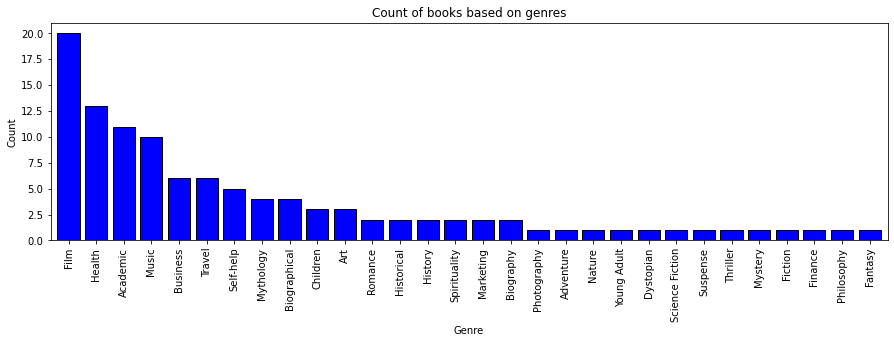

In [20]:
# Create a new figure with a specific size (width=15, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of books based on genres
ax = Books_data['genre'].value_counts().plot(kind='bar',color='b',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('Genre')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of books based on genres')
plt.show()

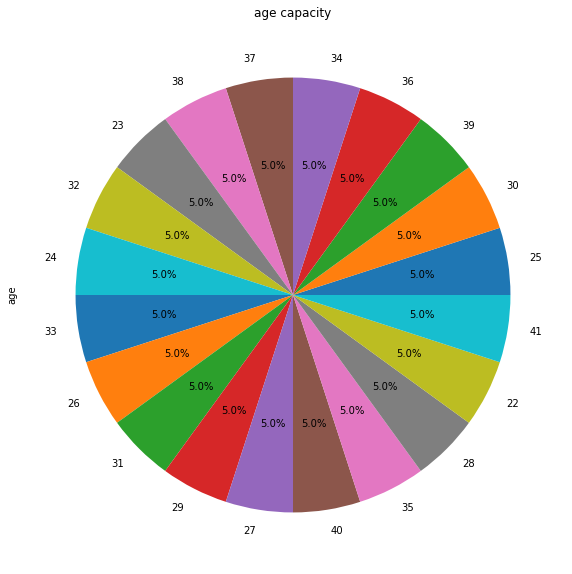

In [21]:
# Plot a pie chart of the age capacity distribution
plt.figure(figsize=(25, 10))
user_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set the title of the plot
plt.title("age capacity")

# Display the plot
plt.show()

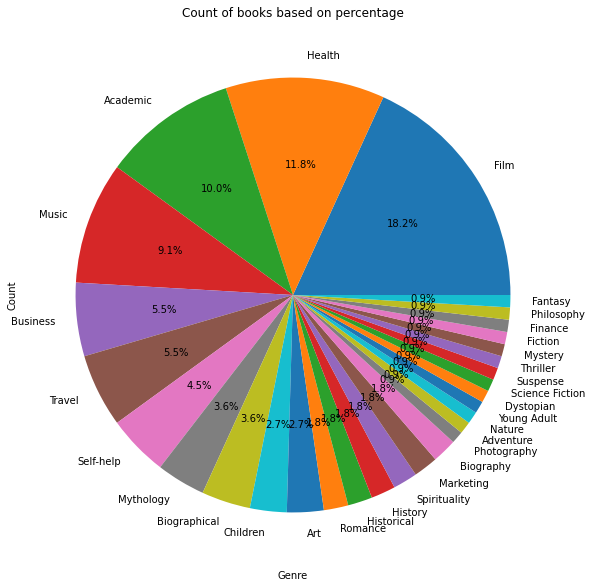

In [22]:
# Create a new figure with a specific size (width=25, height=10)
plt.figure(figsize=(25, 10))

# Create a bar plot showing the count of books based on genre types
ax = Books_data['genre'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=10)

# Set the x-axis label
plt.xlabel('Genre')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of books based on percentage')
plt.show()

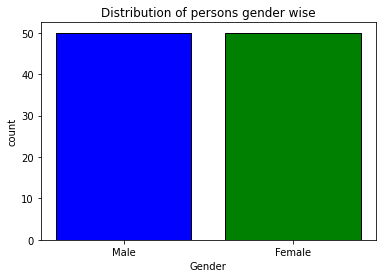

In [23]:
# Count the number of persons gender wise
guest_counts = user_data['gender'].value_counts()

colors = ['blue', 'green']  

# Create a bar chart to visualize the distribution of persons gender wise

plt.bar(guest_counts.index, guest_counts.values, color=colors,edgecolor='black')
# Set the x-axis label
plt.xlabel('Gender')
# Set the y-axis label
plt.ylabel('count')
# Set the title of the plot
plt.title('Distribution of persons gender wise')

plt.show()

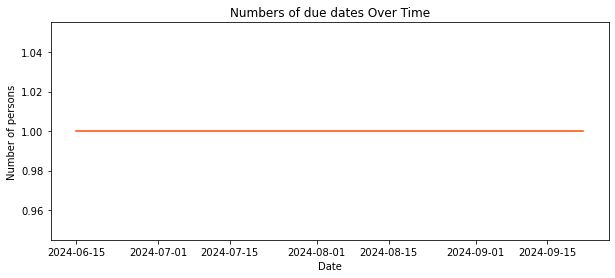

In [24]:
 # Convert the 'dueDate' column to datetime format
order_dates = pd.to_datetime(checkouts_data['due_date'])

orders_counts = order_dates.value_counts().sort_index()
plt.figure(figsize=(10,4))
# Plot the total amount of duedate over time
plt.plot(orders_counts.index, orders_counts.values,color='#FF4600')
# Label the x-axis as 'Date'
plt.xlabel('Date')
# Label the y-axis as 'Number of persons'
plt.ylabel('Number of persons')
# Set the title of the plot
plt.title('Numbers of due dates Over Time')
# Display the plot
plt.show()

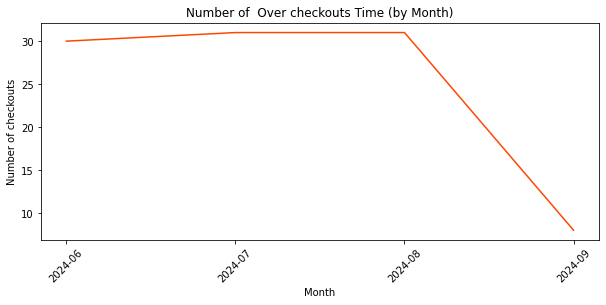

In [25]:
# Convert the 'checkoutDate' column to datetime format
checkouts_data['checkout_Date'] = pd.to_datetime(checkouts_data['checkout_date'])

# Group by month and count the number of checkouts for each month
monthly_orders = checkouts_data['checkout_Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 4))
# Plot the number of checkouts over time by month
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, color="#FF4600")
# Add label to the x-axis
plt.xlabel('Month')
# Add label to the y-axis
plt.ylabel('Number of checkouts')
# Add title to the plot
plt.title('Number of  Over checkouts Time (by Month)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()

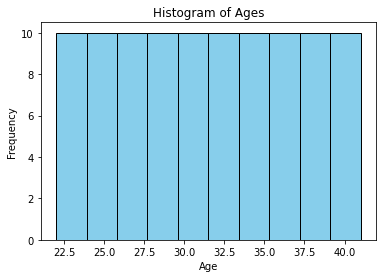

In [26]:
 

# Assuming 'union_data' contains the merged data from the SQL query
# For example, let's plot a histogram of ages
plt.hist(union_data['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()


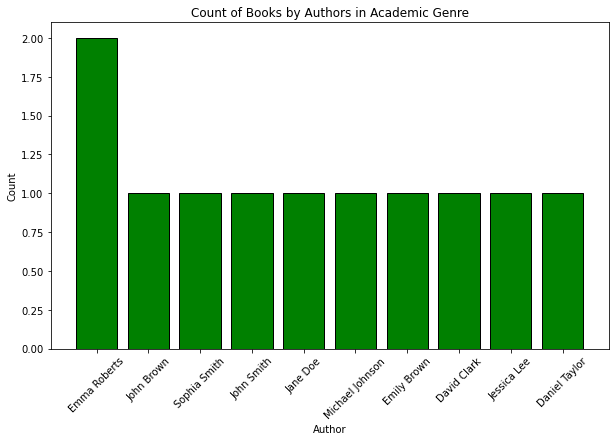

In [27]:
import matplotlib.pyplot as plt

# Assuming 'Book_status' contains the filtered DataFrame
# For example, let's plot a bar chart of the count of books based on authors in the 'Academic' genre
plt.figure(figsize=(10, 6))
author_counts = Book_status['author'].value_counts()
plt.bar(author_counts.index, author_counts.values, color='g', edgecolor='black')
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Count of Books by Authors in Academic Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



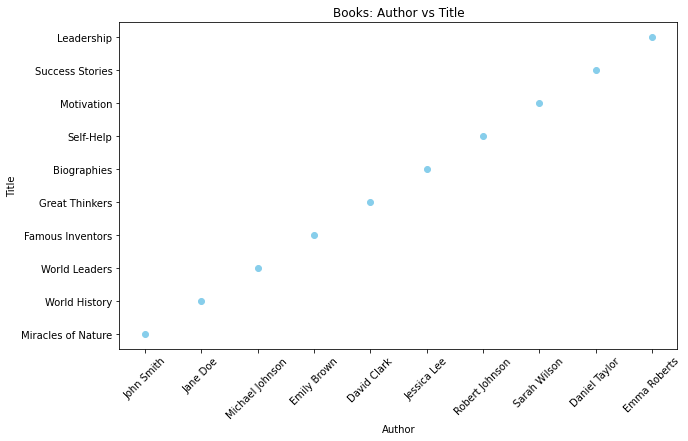

In [28]:
subset_data = Books_data.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['author'], subset_data['title'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Title')
plt.title('Books: Author vs Title')
plt.xticks(rotation=45)
 
plt.show()




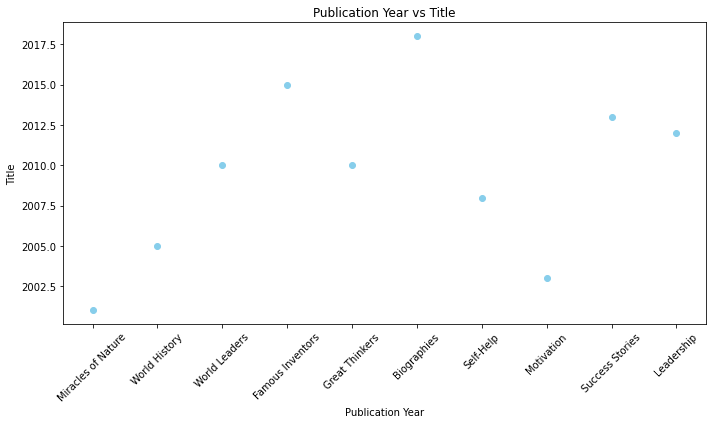

In [29]:
subset_data = Books_data.head(10)
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['title'], subset_data['publication_year'], color='skyblue')
plt.xlabel('Publication Year')
plt.ylabel('Title')
plt.title('Publication Year vs Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

#####                 Finally, analyzing book circulation and popularity data allows libraries to evaluate the effectiveness of their services and programs. By monitoring circulation trends over time, libraries can assess the impact of initiatives such as collection development strategies, marketing campaigns, and outreach efforts. This data-driven approach enables libraries to identify areas for improvement and make evidence-based decisions to enhance their services and meet the needs of their community effectively.